## EDA:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/Data_Cleaned')
df.head(2)
# df.shape

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0


In [3]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### We have already fixed the missing values.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


### Monthwise Analysis of Forest-Fire

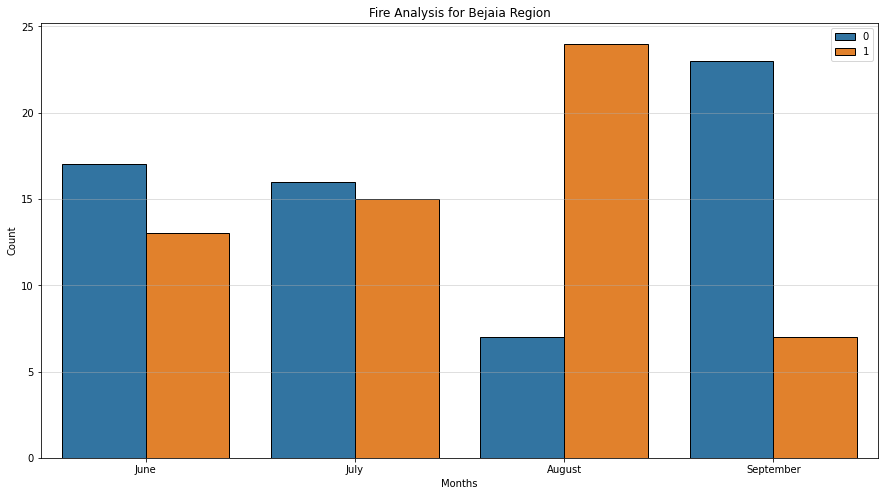

In [5]:
# Region 1:
dfregion= df.loc[df['Region']== 1]
plt.subplots(figsize=(15,8))
sns.countplot(x='month',hue='Classes',data= dfregion, ec = 'black')
plt.title('Fire Analysis for Bejaia Region')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.5, axis = 'y')
plt.show()

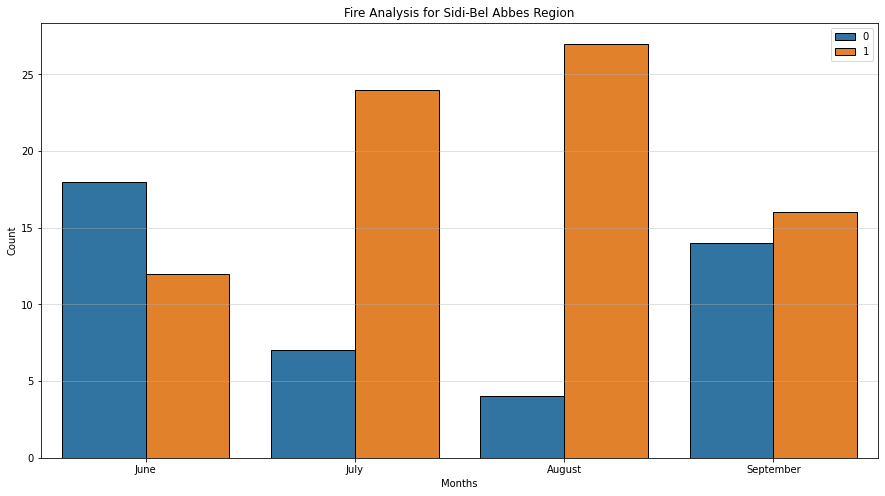

In [6]:
# Region 2:
dfregion= df.loc[df['Region']== 2]
plt.subplots(figsize=(15,8))
sns.countplot(x='month',hue='Classes',data= dfregion, ec = 'black')
plt.title('Fire Analysis for Sidi-Bel Abbes Region')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.5, axis = 'y')
plt.show()

#### From the above countplot, we can observe the following:
#### Region 1 : Had most number of forest-fires on August and September
#### Region 2 : Had most number of forest-fires on July and August
#### So, most commonly affected months are July, August and September.

### Hist Plot:

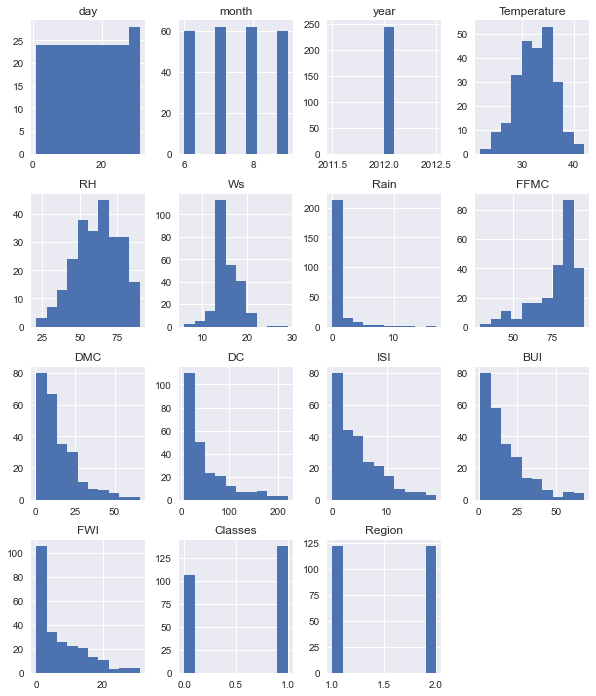

In [7]:
plt.style.use('seaborn')
df.hist(figsize=(10,12))
plt.show()

#### From the above plots we can see day, month, year  and region are not having any distribution, so we can drop those features.

In [8]:
df.drop(['day', 'month', 'year', 'Region'], axis=1, inplace=True)

In [9]:
df.head(2)
# df.shape

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0


### Pair Plot:

<Figure size 720x1080 with 0 Axes>

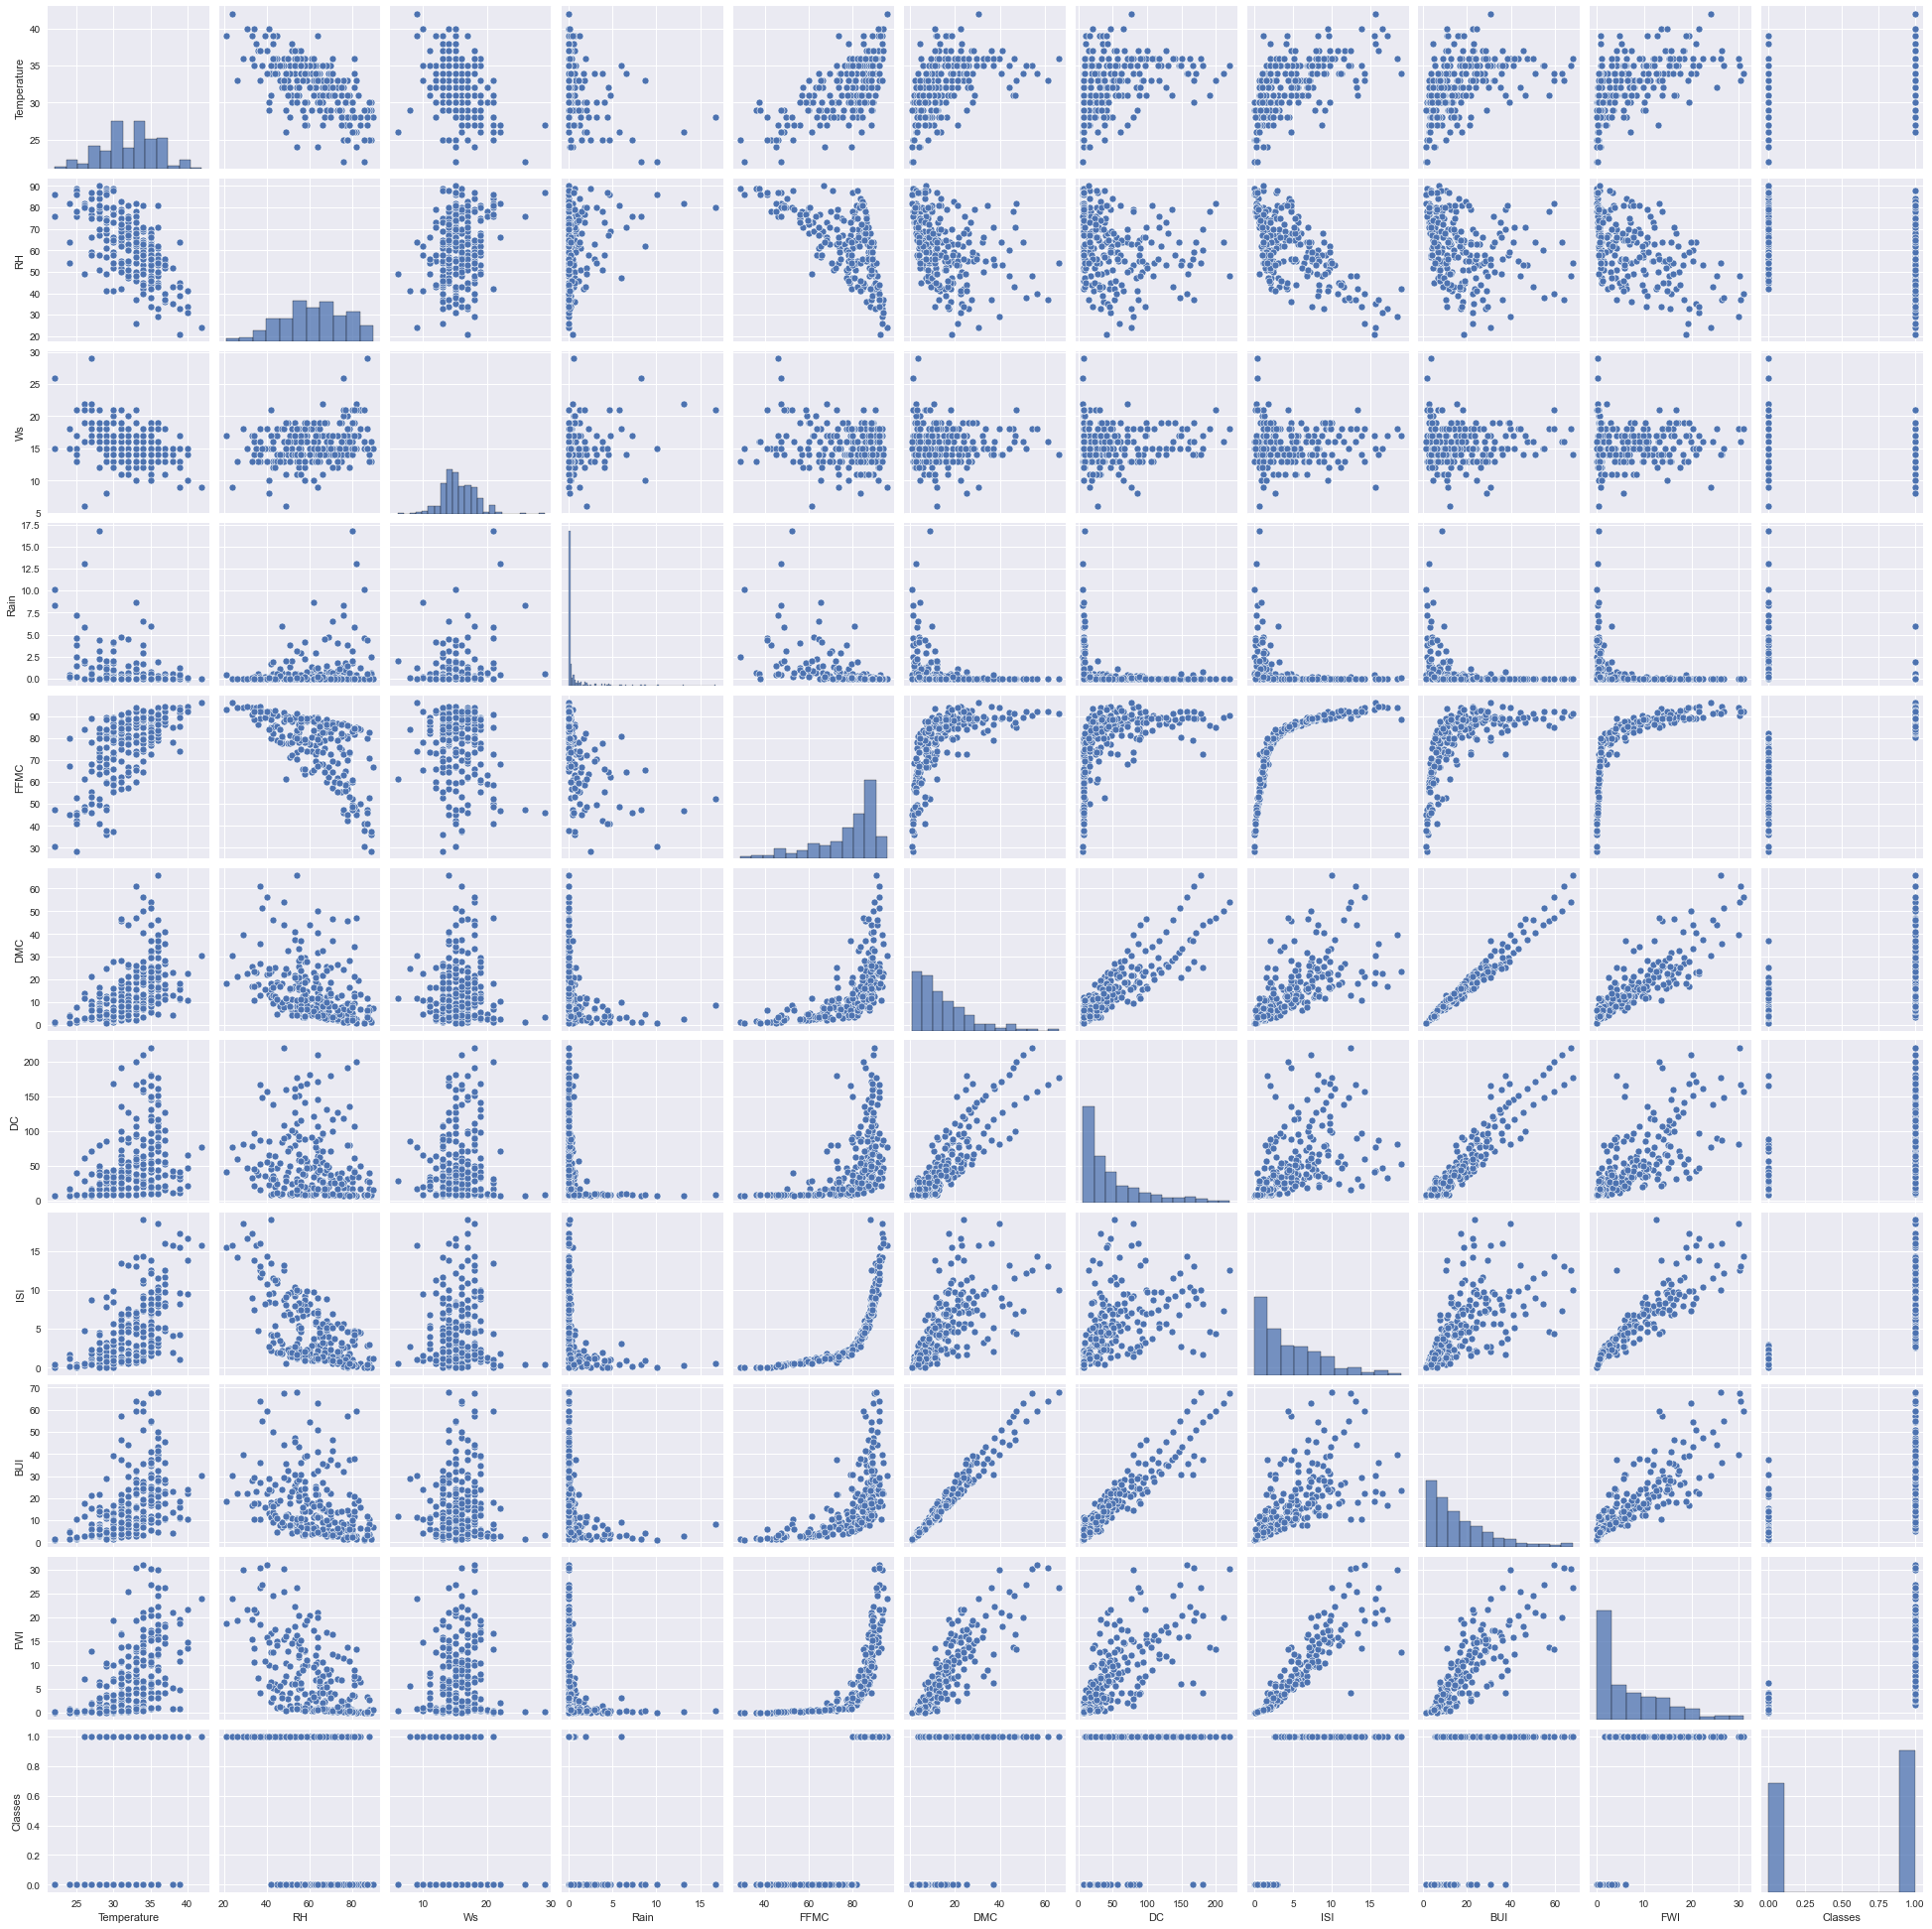

In [10]:
plt.figure(figsize=(10,15))
sns.pairplot(df)
plt.show()

### Hist plot to check fire will affect or not :

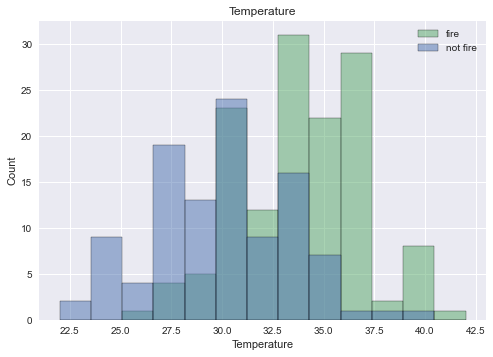

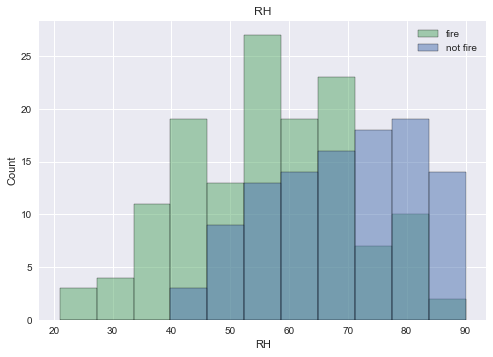

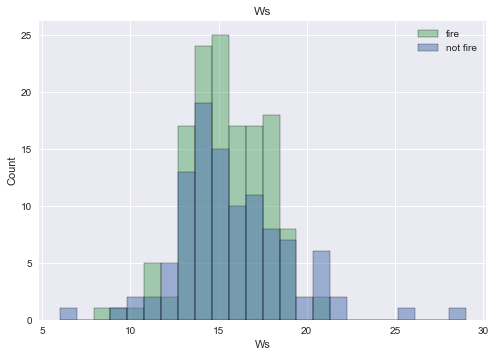

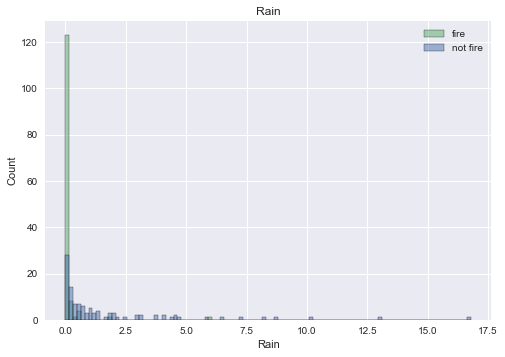

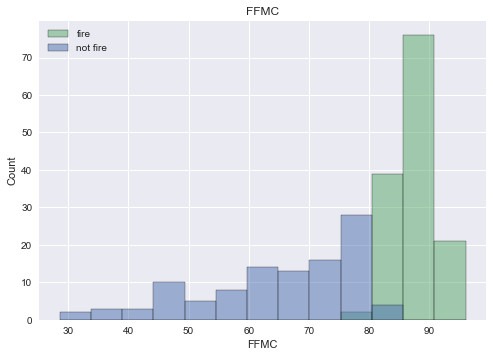

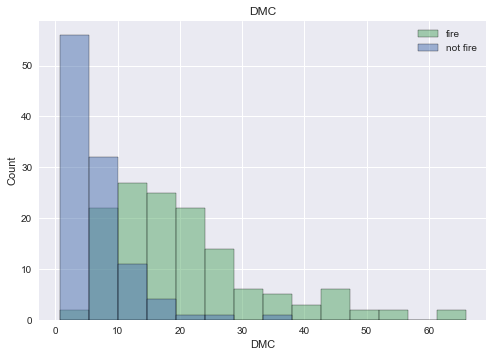

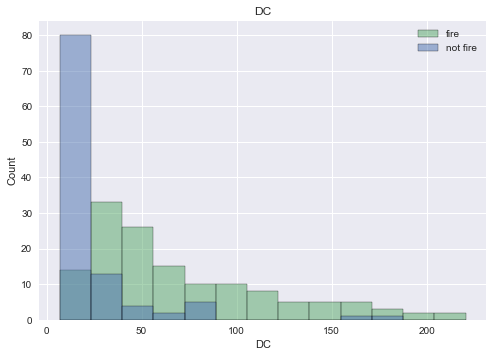

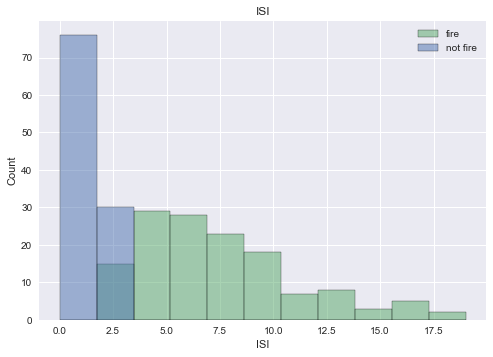

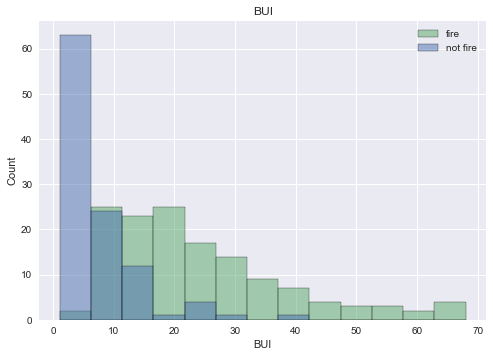

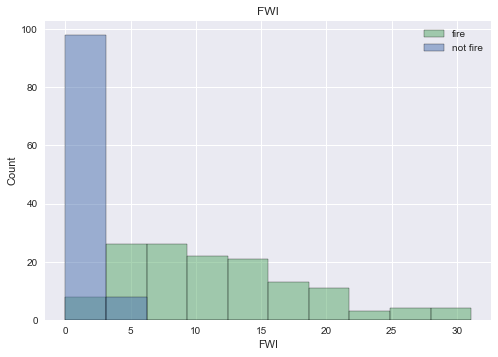

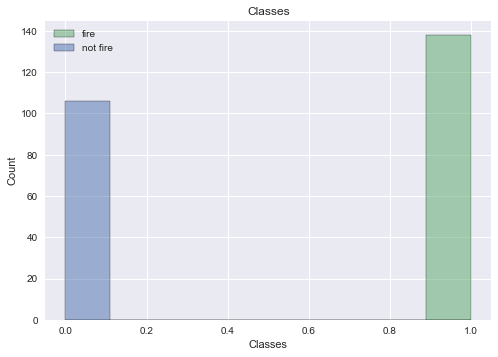

In [11]:
data = df.copy()
for feature in df.columns:
    sns.histplot(x=feature, hue='Classes', data=data)
    plt.title(feature)
    plt.legend(labels=['fire', 'not fire'])
    plt.show()

### Fire Cause Report: Chances of fires on different units are below:
#### Weather data observations:
* Temparature: >= 32
* Relative Humidity: <= 70
* Wind Speed: >=13 and <=19
* Rain: <=0.1

#### FWI Components:
* Fine Fuel Moisture Code: >=80
* Duff Moisture Code: >=10
* Drought Code: >=20
* Initial Spread Index: >=3
* Buildup Index: >=5
* Fire Weather Index: >=3.9

# Pre-Processing:

### Checking Skewness on data:

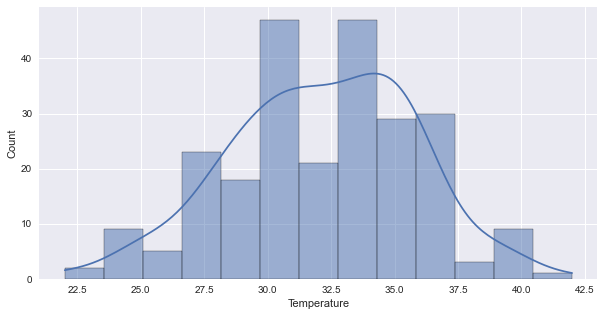

SKew for Temperature = -0.19630887951190434


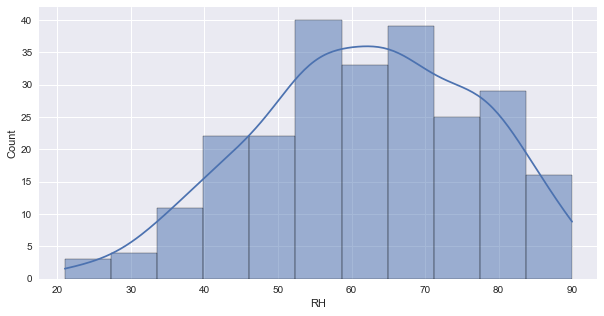

SKew for RH = -0.23796439326918462


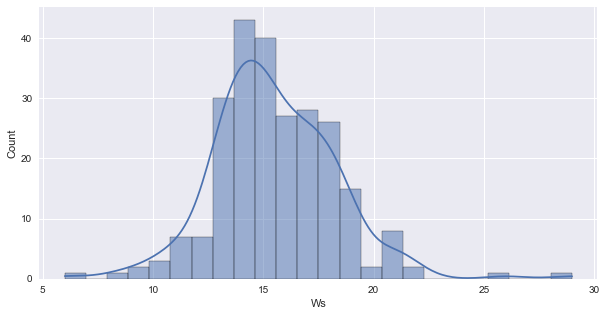

SKew for Ws = 0.5458812499001592


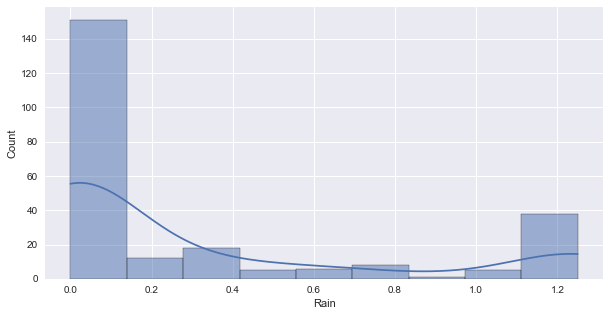

SKew for Rain = 1.2462895299044137


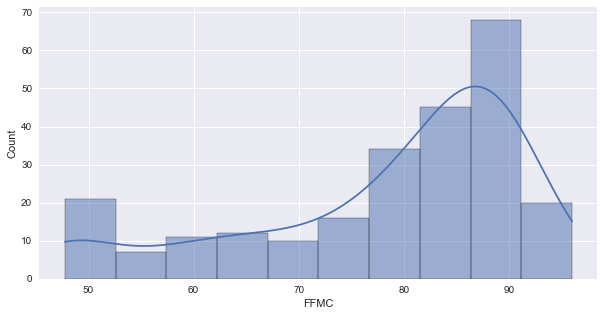

SKew for FFMC = -1.0738345759563537


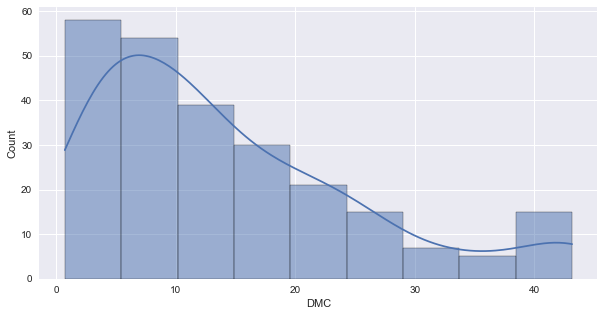

SKew for DMC = 1.0899089525029824


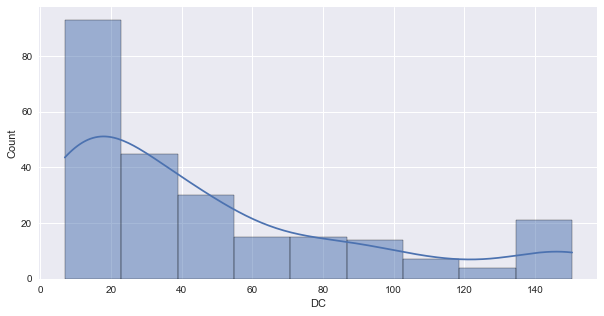

SKew for DC = 1.1593337859090467


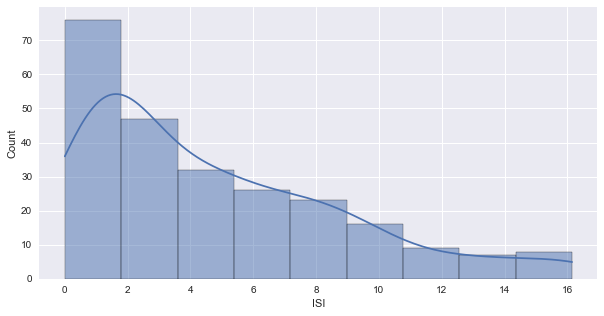

SKew for ISI = 1.0216073321457622


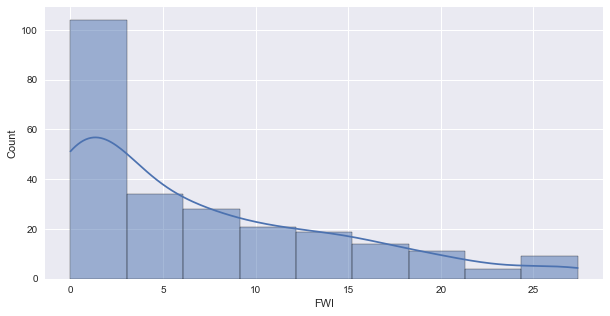

SKew for FWI = 1.0588271512288128


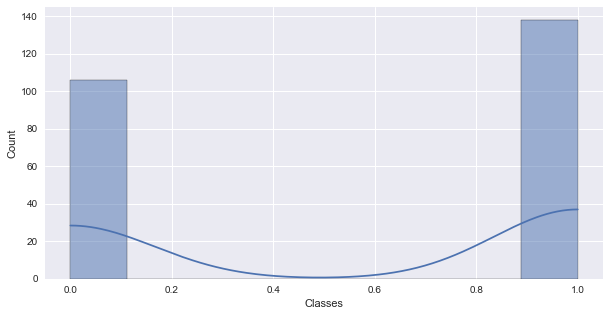

SKew for Classes = -0.266219698023775
{'Temperature': -0.19630887951190434, 'RH': -0.23796439326918462, 'Ws': 0.5458812499001592, 'Rain': 1.2462895299044137, 'FFMC': -1.0738345759563537, 'DMC': 1.0899089525029824, 'DC': 1.1593337859090467, 'ISI': 1.0216073321457622, 'FWI': 1.0588271512288128, 'Classes': -0.266219698023775}


In [32]:
data = df.copy()
key_value = {}
for i in data.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data[i], kde=True)
    plt.show()
    key_value[i] = data[i].skew()
    print(f"SKew for {i} = {data[i].skew()}")
    
print(key_value)

In [13]:
# Before Outliers:

skewitems = sorted(key_value.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
skewitems

[('Rain', 4.57907059640398),
 ('DMC', 1.5276523856829873),
 ('DC', 1.479055794047031),
 ('BUI', 1.4590686080976978),
 ('FWI', 1.1533935293338498),
 ('ISI', 1.1219754608509633),
 ('Ws', 0.5458812499001592),
 ('Temperature', -0.19630887951190434),
 ('RH', -0.23796439326918462),
 ('Classes', -0.266219698023775),
 ('FFMC', -1.3256332623474232)]

In [33]:
# After Outliers:

skewitems = sorted(key_value.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
skewitems

[('Rain', 1.2462895299044137),
 ('DC', 1.1593337859090467),
 ('DMC', 1.0899089525029824),
 ('FWI', 1.0588271512288128),
 ('ISI', 1.0216073321457622),
 ('Ws', 0.5458812499001592),
 ('Temperature', -0.19630887951190434),
 ('RH', -0.23796439326918462),
 ('Classes', -0.266219698023775),
 ('FFMC', -1.0738345759563537)]

#### From the above results of Skewness only 'Rain' feature has more skewed.

## Fixing Outliers:

<AxesSubplot:>

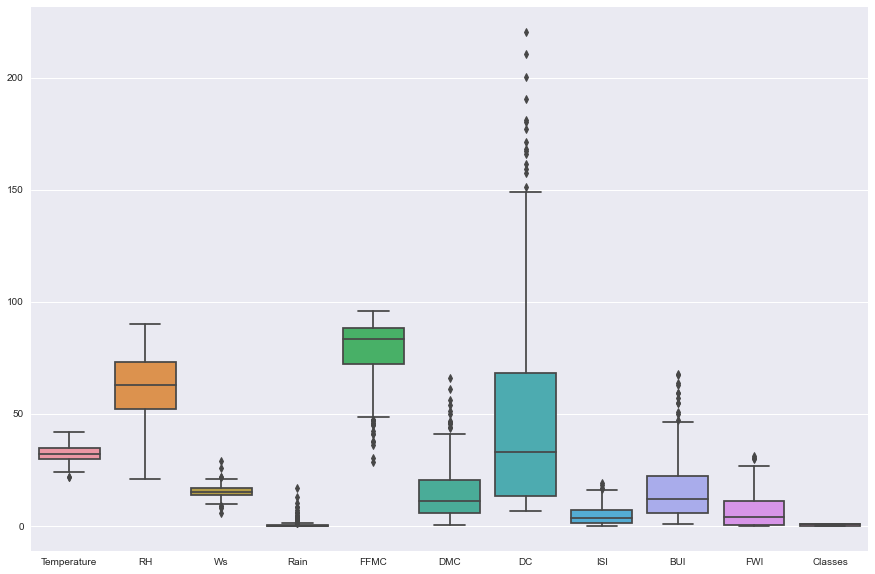

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df)

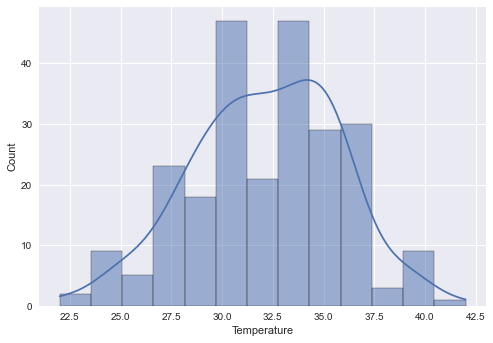

In [16]:
sns.histplot(df.Temperature, kde=True)
plt.show()

#### Based on above boxplot and skewness we can see except Ws, RH, Temperature, Classes features has high outliers:
#### Since the features which has highly skewed distribution we follow IQR method.
#### Since Temperature has some gaussian distribution we follow Z-Score method.
#### So, Instead of removing outlier values, we going to flooring the values.

In [17]:
data = df.copy()
def fix_outliers_zscore(columns):
    for feature in columns:
        mean = data[feature].mean()
        std = data[feature].std()
        lowerBound = mean - 3 * std
        upperBound = mean + 3 * std
        print(f"{feature}: {lowerBound} {upperBound}")
        df[feature] = np.where(df[feature]>upperBound, upperBound, np.where(df[feature]<lowerBound, lowerBound, df[feature])) 

In [18]:
# Flooring the outliers:

fix_outliers_zscore(['Temperature'])

Temperature: 21.270601367355567 43.073660927726394


In [19]:
data = df.copy()
def fix_outliers_iqr(columns): 
    for feature in columns:
        sorted_data = data.sort_values(by=feature, ascending=True)
        Q1 = sorted_data[feature].quantile(.25)
        Q3 = sorted_data[feature].quantile(.75)
        IQR = Q3 - Q1
        lowerBound = Q1 - 1.5*IQR
        upperBound = Q3 + 1.5*IQR
        print(f"{feature}: {lowerBound} {upperBound}")
        # data.loc[data[feature]<=lowerBound, feature] = lowerBound
        # data.loc[data[feature]>=higherBound, feature] = higherBound
        df[feature] = np.where(df[feature]>upperBound, upperBound, np.where(df[feature]<lowerBound, lowerBound, df[feature])) 

In [20]:
# Flooring the outliers:
data = df.copy()
data = data.drop(['Temperature', 'Classes', 'Ws', 'RH'], axis=1)
fix_outliers_iqr(data.columns)

Rain: -0.75 1.25
FFMC: 47.73750000000001 112.63749999999999
DMC: -16.624999999999996 43.175
DC: -69.03750000000002 150.46250000000003
ISI: -7.450000000000001 16.150000000000002
BUI: -18.787499999999998 47.3125
FWI: -15.312500000000004 27.387500000000003


In [21]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57,18,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0
1,29.0,61,13,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0
2,26.0,82,22,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0
3,25.0,89,13,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0
4,27.0,77,16,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0


<AxesSubplot:>

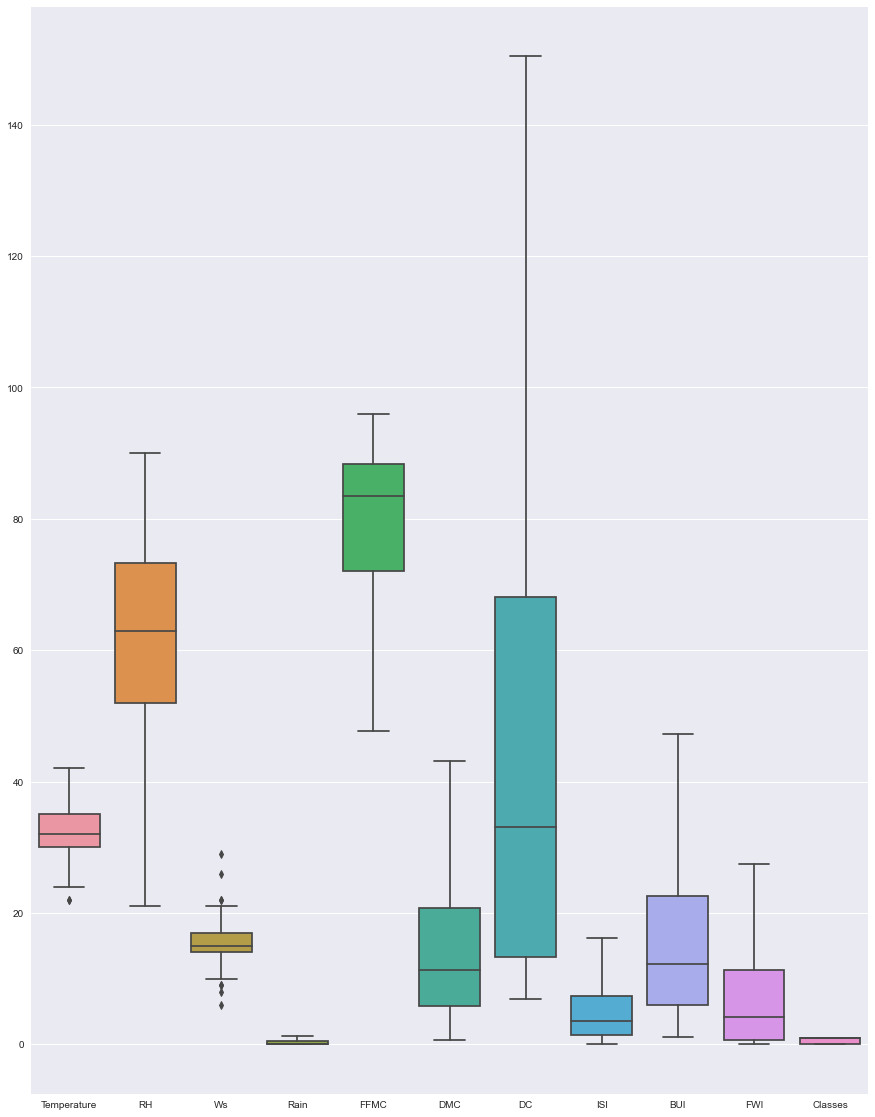

In [22]:
plt.figure(figsize=(15,20))
sns.boxplot(data= df)

In [23]:
# data.to_excel('Datasets/check.xlsx', index=False)

## Correlation:

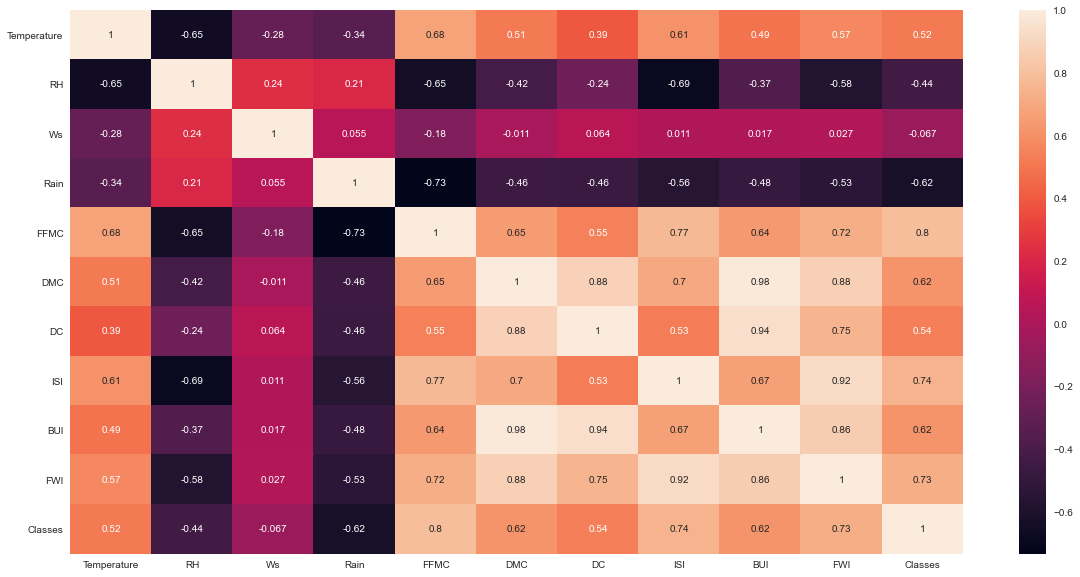

In [24]:
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
correlation(df, .90)

{'BUI', 'FWI'}

#### Since BUI is based on the DMC and the DC, am dropping BUI feature as follows:

In [27]:
df.drop(['BUI'], axis=1, inplace=True)

In [28]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
0,29.0,57,18,0.00,65.7000,3.4,7.6,1.3,0.5,0
1,29.0,61,13,1.25,64.4000,4.1,7.6,1.0,0.4,0
2,26.0,82,22,1.25,47.7375,2.5,7.1,0.3,0.1,0
3,25.0,89,13,1.25,47.7375,1.3,6.9,0.0,0.0,0
4,27.0,77,16,0.00,64.8000,3.0,14.2,1.2,0.5,0


In [29]:
df.shape

(244, 10)

In [30]:
df.to_csv('Datasets/SkewOutliersMulticorr', index= False)
df.to_excel('Datasets/SOM.xlsx', index= False)